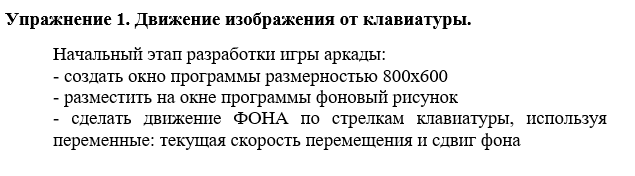

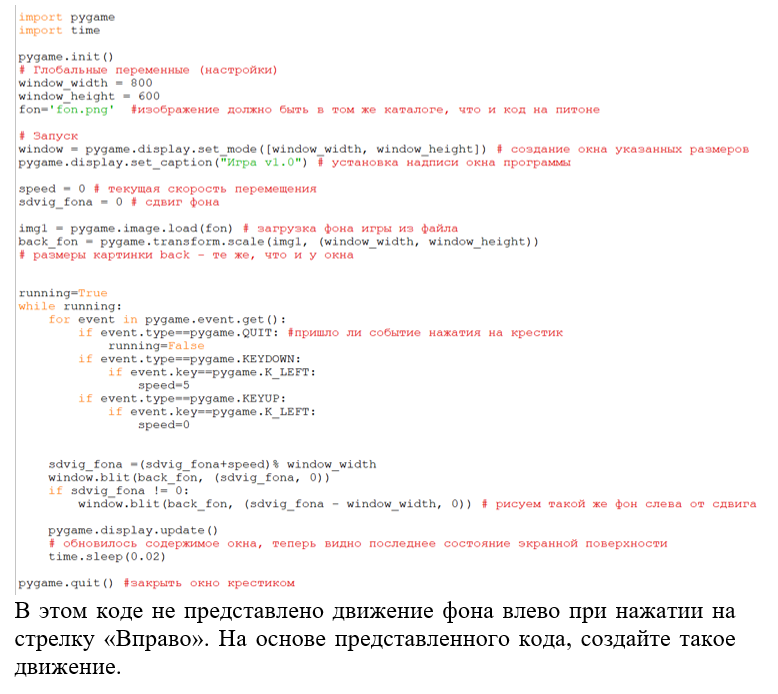

In [11]:
import pygame
import time

pygame.init()

# Глобальные переменные (настройки)
window_width = 800
window_height = 600
fon = 'fon.png'  # изображение должно быть в том же каталоге, что и код

# Запуск
window = pygame.display.set_mode([window_width, window_height])  # создание окна указанных размеров
pygame.display.set_caption("Игра v1.0")  # установка заголовка окна

speed = 0  # текущая скорость перемещения
sdvig_fona = 0  # сдвиг фона

img1 = pygame.image.load(fon)  # загрузка фона игры из файла
back_fon = pygame.transform.scale(img1, (window_width, window_height))  # подгоняем под размер окна

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:  # Закрытие окна
            running = False

        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_RIGHT:  # Двигаем фон влево при нажатии "Вправо"
                speed = -5
            if event.key == pygame.K_LEFT:  # Останавливаем фон при нажатии "Влево"
                speed = 0

        if event.type == pygame.KEYUP:
            if event.key == pygame.K_RIGHT or event.key == pygame.K_LEFT:
                speed = 0

    # Обновление позиции фона
    sdvig_fona += speed

    # Зацикливание фона
    if sdvig_fona <= -window_width:
        sdvig_fona = 0

    # Рисуем два изображения, чтобы создать эффект бесконечного фона
    window.blit(back_fon, (sdvig_fona, 0))
    window.blit(back_fon, (sdvig_fona + window_width, 0))

    pygame.display.update()  # Обновляем экран
    time.sleep(0.02)  # Небольшая задержка для плавности

pygame.quit()  # Закрытие Pygame

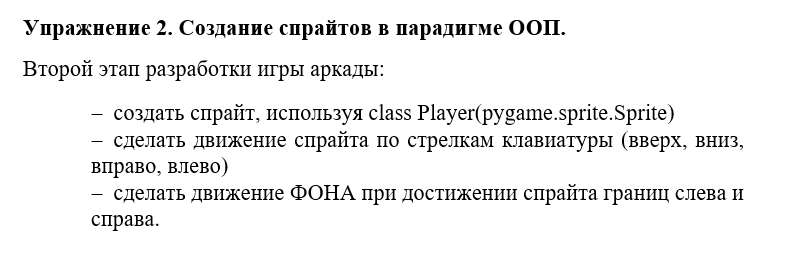

In [2]:
class Player(pygame.sprite.Sprite):
    def __init__(self, filename, hero_x=100, hero_y=250, x_speed=0, y_speed=0):
        pygame.sprite.Sprite.__init__(self)
        self.image = pygame.image.load(filename) # загрузка героя из файла
        self.rect = self.image.get_rect()
        self.hero_x = hero_x
        self.hero_y = hero_y
        # ставим персонажа в переданную точку (x, y):
        self.rect.x = hero_x
        self.rect.y = hero_y
        # создаем скорость движения спрайта:
        self.x_speed = x_speed
        self.y_speed = y_speed

    def update(self):
        ''' перемещает персонажа,
        применяя текущую горизонтальную и вертикальную скорость''' 
        self.rect.x += self.x_speed
        self.rect.y += self.y_speed

filename = 'character.png'
hero = Player(filename)
print(hero.__dict__)

{'_Sprite__g': set(), 'image': <Surface(1024x991x32 SW)>, 'rect': <rect(100, 250, 1024, 991)>, 'hero_x': 100, 'hero_y': 250, 'x_speed': 0, 'y_speed': 0}


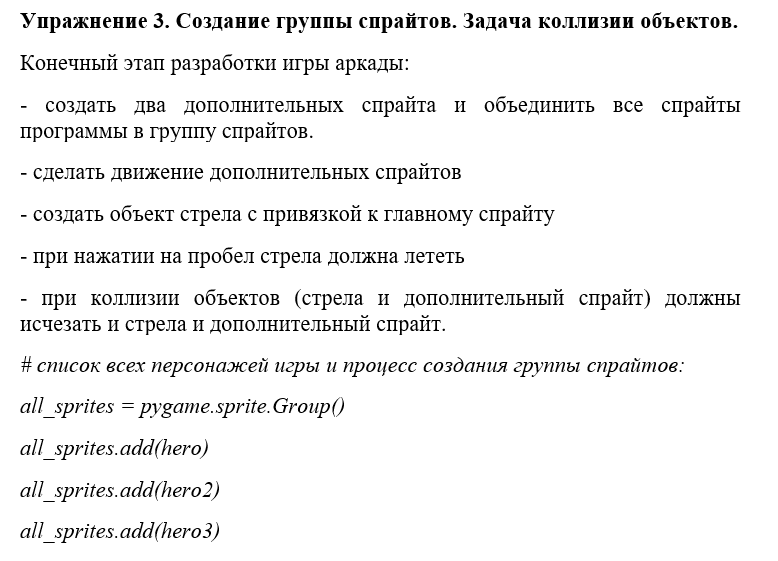

In [10]:
import pygame
import random
import sys

# Инициализация Pygame
pygame.init()

# Настройки окна
window_width = 800
window_height = 600
window = pygame.display.set_mode((window_width, window_height))
pygame.display.set_caption("Аркадная игра - Улучшенная версия")

# Загрузка изображений
def load_image(name, scale=1, flip_x=False, flip_y=False):
    try:
        image = pygame.image.load(name)
        if scale != 1:
            size = image.get_size()
            image = pygame.transform.scale(image, (int(size[0] * scale), int(size[1] * scale)))
        if flip_x or flip_y:
            image = pygame.transform.flip(image, flip_x, flip_y)
        return image
    except:
        print(f"Не могу загрузить изображение: {name}")
        # Создаем заглушку
        surf = pygame.Surface((50, 50))
        surf.fill((255, 0, 255))
        return surf

# Загрузка фона
try:
    background = pygame.image.load('fon.png')
    background = pygame.transform.scale(background, (window_width, window_height))
except:
    background = pygame.Surface((window_width, window_height))
    background.fill((135, 206, 235))  # Голубой фон если нет изображения

# Класс игрока (в 3 раза меньше, полное управление)
class Player(pygame.sprite.Sprite):
    def __init__(self):
        super().__init__()
        self.image = load_image("character.png", 0.1)  # Уменьшаем в 3 раза
        self.rect = self.image.get_rect()
        self.rect.centerx = window_width // 2
        self.rect.centery = window_height // 2
        self.speed = 8

    def update(self):
        keys = pygame.key.get_pressed()
        
        # Сбрасываем скорость
        dx, dy = 0, 0
        
        # Обработка управления
        if keys[pygame.K_LEFT]:
            dx = -self.speed
        if keys[pygame.K_RIGHT]:
            dx = self.speed
        if keys[pygame.K_UP]:
            dy = -self.speed
        if keys[pygame.K_DOWN]:
            dy = self.speed
        
        # Обновляем позицию
        self.rect.x += dx
        self.rect.y += dy
        
        # Ограничение движения в пределах экрана
        self.rect.x = max(0, min(self.rect.x, window_width - self.rect.width))
        self.rect.y = max(0, min(self.rect.y, window_height - self.rect.height))

# Класс врага (движется справа налево)
class Enemy(pygame.sprite.Sprite):
    def __init__(self):
        super().__init__()
        self.image = load_image("enemy.png", 0.2)
        self.rect = self.image.get_rect()
        self.rect.x = window_width  # Появляются справа
        self.rect.y = random.randint(0, window_height - self.rect.height)
        self.speed_x = random.randint(-5, -2)  # Движение влево

    def update(self):
        self.rect.x += self.speed_x
        if self.rect.right < 0:  # Если ушли за левый край
            self.rect.x = window_width  # Возвращаем справа
            self.rect.y = random.randint(0, window_height - self.rect.height)
            self.speed_x = random.randint(-5, -2)

# Класс стрелы (в 5 раз меньше, направлены вправо, вылетают из центра персонажа)
class Arrow(pygame.sprite.Sprite):
    def __init__(self, x, y):
        super().__init__()
        self.image = load_image("arrow.png", 0.1, False, False)  # Отражение по горизонтали
        self.rect = self.image.get_rect()
        self.rect.centerx = x  # Центрируем по x
        self.rect.centery = y  # Центрируем по y
        self.speed = 10

    def update(self):
        self.rect.x += self.speed  # Движение вправо
        if self.rect.left > window_width:  # Если ушли за правый край
            self.kill()

# Создание групп спрайтов
all_sprites = pygame.sprite.Group()
enemies = pygame.sprite.Group()
arrows = pygame.sprite.Group()

# Создание игрока
player = Player()
all_sprites.add(player)

# Создание врагов (теперь только 3)
for i in range(2):
    enemy = Enemy()
    all_sprites.add(enemy)
    enemies.add(enemy)

# Игровой цикл
clock = pygame.time.Clock()
running = True

while running:
    # Обработка событий
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_SPACE:
                # Стрела вылетает из центра персонажа
                arrow = Arrow(player.rect.centerx, player.rect.centery)
                all_sprites.add(arrow)
                arrows.add(arrow)

    # Обновление
    all_sprites.update()

    # Проверка столкновений
    hits = pygame.sprite.groupcollide(arrows, enemies, True, True)
    
    # Добавляем новых врагов при необходимости (поддерживаем 3 врага)
    while len(enemies) < 2:
        enemy = Enemy()
        all_sprites.add(enemy)
        enemies.add(enemy)

    # Отрисовка
    window.blit(background, (0, 0))
    all_sprites.draw(window)
    pygame.display.flip()

    # Управление FPS
    clock.tick(60)

pygame.quit()
sys.exit()

SystemExit: 